In [37]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
from windHelper import WindHelper
from factorModel.factorValidator import *
from datetime import *

In [1]:
beginDate = datetime(2009,12,1)
endDate = datetime(2017,8,22)
para = "close"
df = WindHelper.getMultiTimeSeriesDataFrame(["060E.CS","885009.WI"],beginDate=beginDate,endDate=endDate, para=para)
df = df.dropna()
print WindHelper.__doc__

NameError: name 'datetime' is not defined

In [39]:
df.head()

,060e.cs_close,885009.wi_close
trade_date,,
2009-12-01,133.3849,1151.6009
2009-12-02,133.3743,1151.6756
2009-12-03,133.4586,1151.7310
2009-12-04,133.4318,1151.7913
2009-12-07,133.4732,1151.9162


In [40]:
df.loc[:,"cm"] = df.loc[:,"060e.cs_close"]/df.loc[:,"885009.wi_close"]

In [41]:
config = {"type":POSTIVE, "his_count": 60,"std_count":0, "period": 23}

In [48]:
report = one_direction_test(asset_series=df["060e.cs_close"], 
                             factor_series=df["cm"], 
                             event_name="e001", 
                             config=config,
                             asset_price=True)

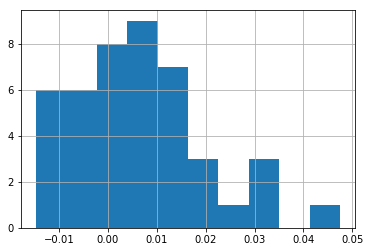

In [50]:
%matplotlib inline
report["ts"]["ret"].hist()

In [44]:
report2 = sharp_ratio_test(asset_series=df["060e.cs_close"], 
                             factor_series=df["cm"], 
                             event_name="e001", 
                             config=config)

In [45]:
report2["ts"].head()

,cm,position,060e.cs_close,value,base
2010-03-04,0.002524,1.0,-0.001722,0.998278,0.998278
2010-03-05,0.002524,1.0,0.000630,0.998907,0.998907
2010-03-08,0.002524,1.0,0.001084,0.999990,0.999990
2010-03-09,0.002524,1.0,-0.001024,0.998966,0.998966
2010-03-10,0.002524,1.0,0.000168,0.999134,0.999134


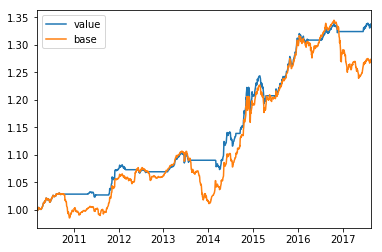

In [46]:
report2["ts"][["value", "base"]].plot()

In [51]:
import pandas_highcharts
from pandas_highcharts.display import display_charts
import matplotlib.pyplot as plt
df = report2["ts"][["value", "base","position"]]
display_charts.__doc__
display_charts(df[["value", "base","position"]], chart_type="stock", title="CM 因子校验", secondary_y=["position"], render_to="my-chart")
# display_charts(df[["position"]], chart_type="stock", title="CM 因子事件信号")